In [1]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [3]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Optional: For better visuals
sns.set(style="whitegrid")
plt.style.use("ggplot")

# 2. Load the Dataset
df = pd.read_csv("Titanic-Dataset.csv")  # Replace with your dataset path
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 3. Basic Info & Summary Stats
print("Dataset Info:")
df.info()

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   

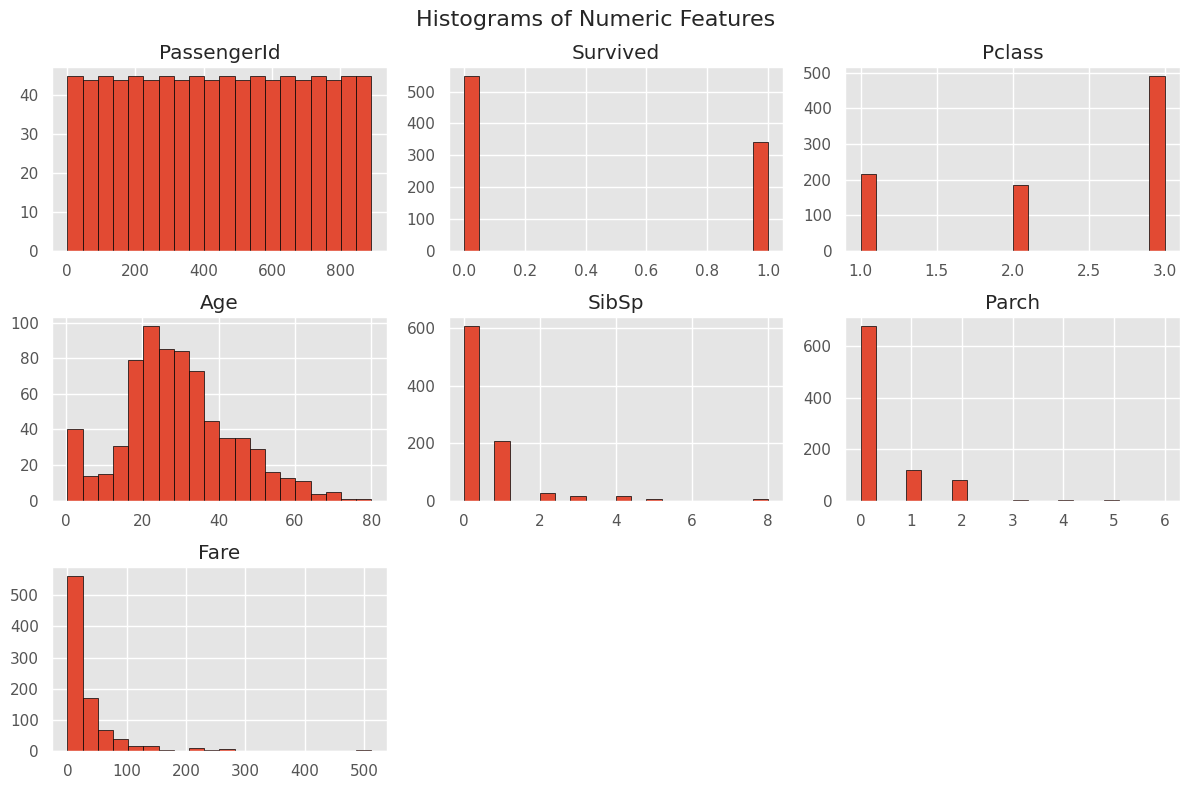

In [6]:
# 4. Univariate Analysis: Histograms
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()



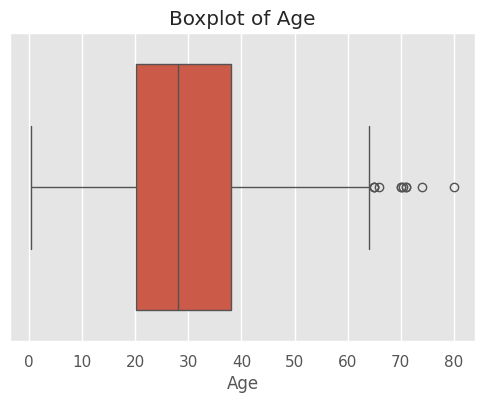

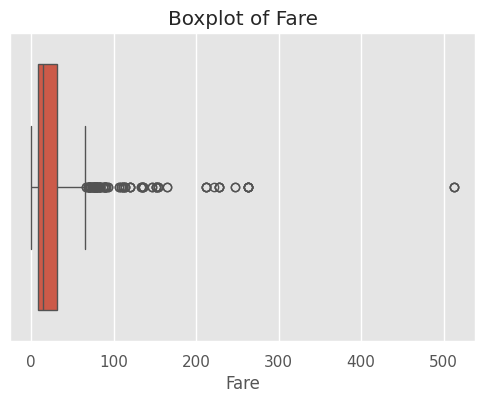

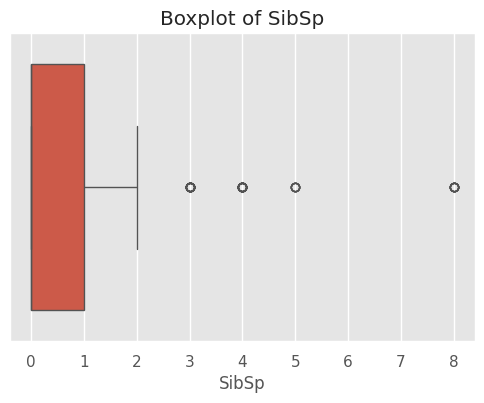

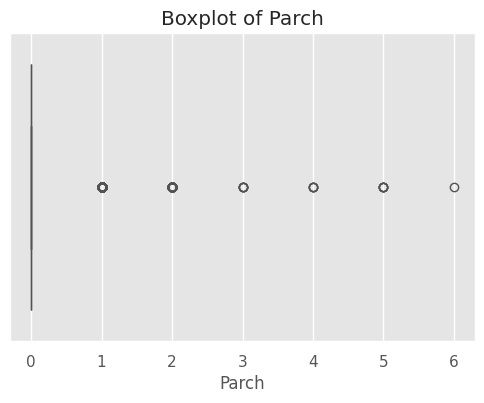

In [7]:
# 5. Boxplots for Outlier Detection
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


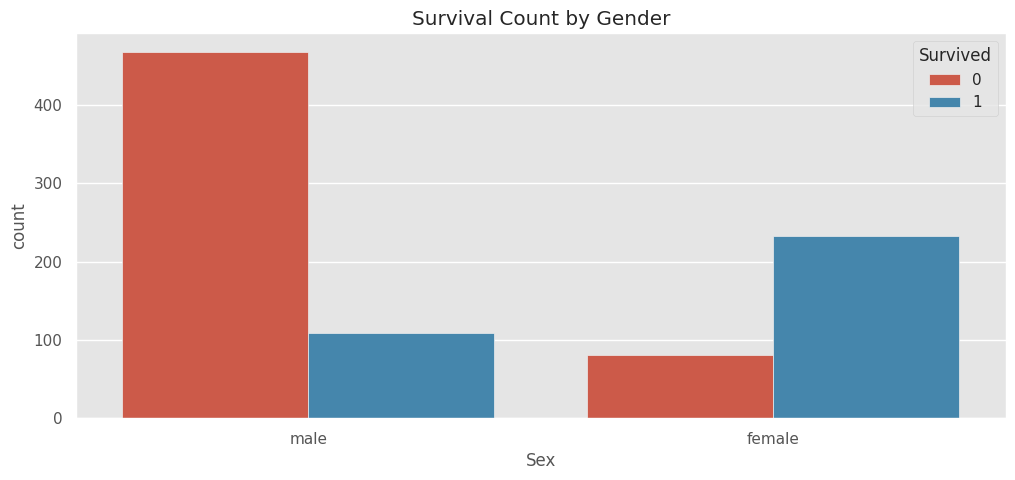

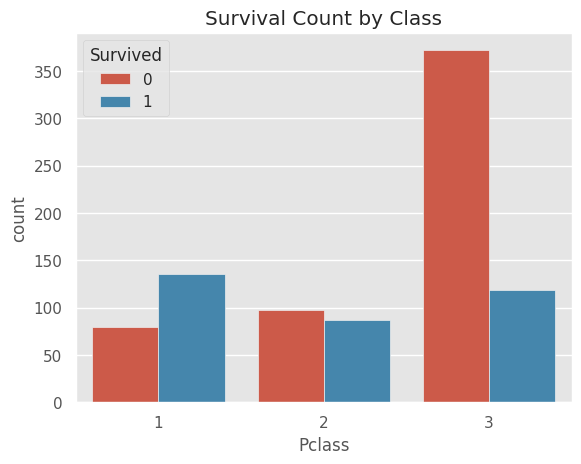

In [8]:
# 6. Categorical Data Countplots
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival Count by Gender")
plt.show()

sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival Count by Class")
plt.show()


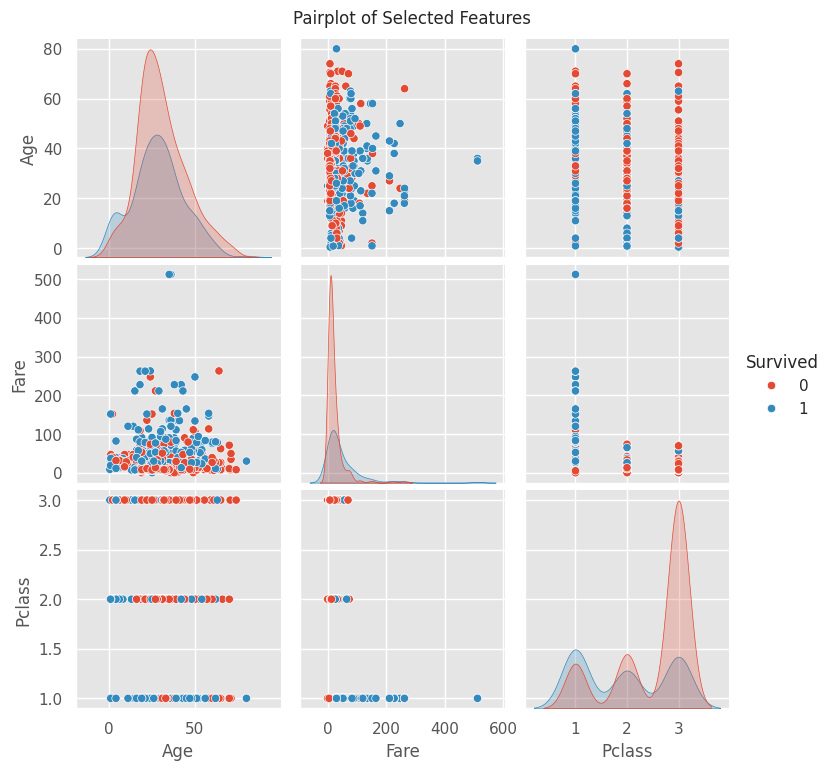

In [11]:
# 7. Pairplot for Feature Relationships
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


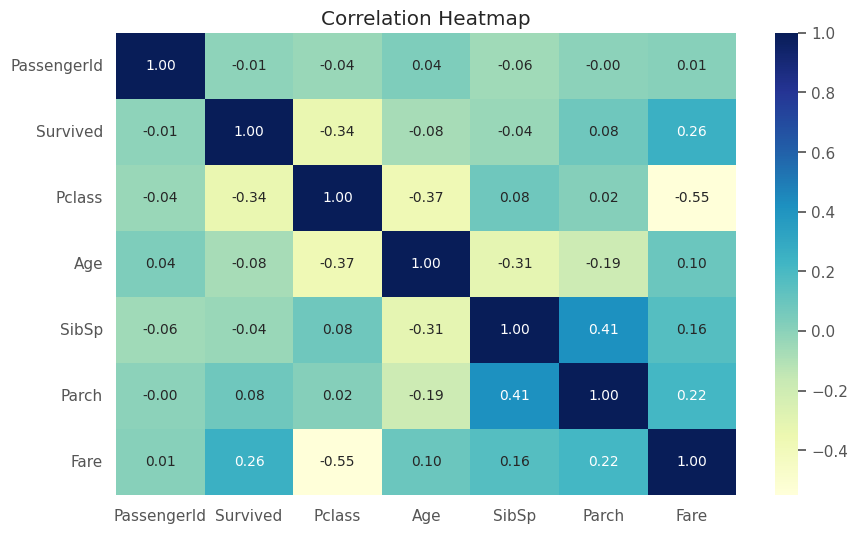

In [10]:
# 8. Correlation Matrix
plt.figure(figsize=(10, 6))
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [12]:
# 9. Detect Skewness
print("Skewness of Numeric Columns:")
print(df[numeric_cols].skew())


Skewness of Numeric Columns:
Age      0.389108
Fare     4.787317
SibSp    3.695352
Parch    2.749117
dtype: float64


In [13]:
# 10. Interactive Plot with Plotly
fig = px.scatter(df, x='Age', y='Fare', color='Survived',
                 title='Age vs Fare (colored by Survival)')
fig.show()
